# Disecting "surface_code.py"

In [1]:
import numpy as np

In [2]:
example_ones = np.ones((2,5,5))
print(example_ones)

[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]


In [3]:
l1 = np.arange(1,10,2)
l2 = np.arange(0,10,2)
print(l1)


[1 3 5 7 9]


In [4]:
x,y = np.meshgrid(l1, l2)
print("x =\n{}\n\ny =\n{}".format(x,y))

x =
[[1 3 5 7 9]
 [1 3 5 7 9]
 [1 3 5 7 9]
 [1 3 5 7 9]
 [1 3 5 7 9]]

y =
[[0 0 0 0 0]
 [2 2 2 2 2]
 [4 4 4 4 4]
 [6 6 6 6 6]
 [8 8 8 8 8]]


In [5]:
x2,y2 = np.meshgrid(l2, l1)
print("x2 =\n{}\n\ny2 =\n{}".format(x2,y2))

x2 =
[[0 2 4 6 8]
 [0 2 4 6 8]
 [0 2 4 6 8]
 [0 2 4 6 8]
 [0 2 4 6 8]]

y2 =
[[1 1 1 1 1]
 [3 3 3 3 3]
 [5 5 5 5 5]
 [7 7 7 7 7]
 [9 9 9 9 9]]


In [6]:
v=np.vstack((y.flatten(), x.flatten()))
print(v)

[[0 0 0 0 0 2 2 2 2 2 4 4 4 4 4 6 6 6 6 6 8 8 8 8 8]
 [1 3 5 7 9 1 3 5 7 9 1 3 5 7 9 1 3 5 7 9 1 3 5 7 9]]


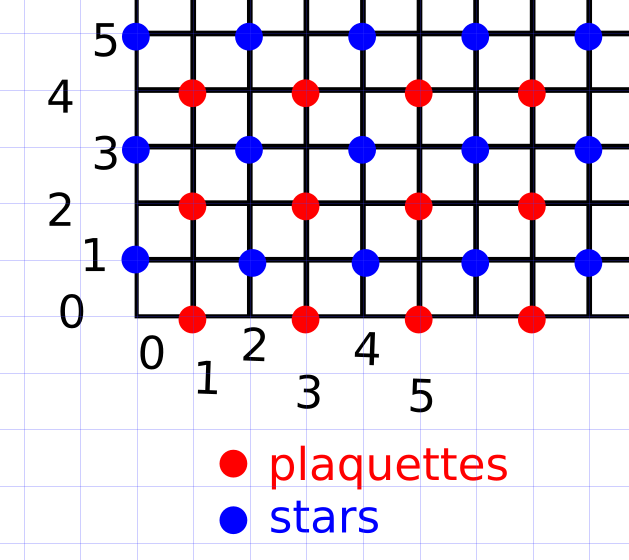

In [7]:
from IPython.display import Image
Image("stars_plaquettes_position.png")

In [8]:
        side=7
    
        ind1 = np.arange(1, side, 2)
        ind2 = np.arange(0, side, 2)

        # Array with the qubits to mark erors
        # self.qubits[0] marks the Z errors
        # self.qubits[1] marks the X erros
        qubits = np.ones((2, side,side))
        print(qubits)
        

[[[1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]]]


In [9]:
        starsy, starsx = np.meshgrid(ind1, ind2)
        plaqsy, plaqsx = np.meshgrid(ind2, ind1)
        stars = np.vstack((starsx.flatten(), starsy.flatten()))
        plaqs = np.vstack((plaqsx.flatten(), plaqsy.flatten()))
        print("stars=\n{}\n\nplaqs=\n{}".format(stars,plaqs))

stars=
[[0 0 0 2 2 2 4 4 4 6 6 6]
 [1 3 5 1 3 5 1 3 5 1 3 5]]

plaqs=
[[1 1 1 1 3 3 3 3 5 5 5 5]
 [0 2 4 6 0 2 4 6 0 2 4 6]]


In [10]:
        # Array with tags: Q, S or P useful for indexing
        tags = np.ones((side,side), dtype=str)
        tags.fill("Q")
        tags[stars[0], stars[1]] = "S"
        tags[plaqs[0], plaqs[1]] = "P"
        print(tags)
        

[['Q' 'S' 'Q' 'S' 'Q' 'S' 'Q']
 ['P' 'Q' 'P' 'Q' 'P' 'Q' 'P']
 ['Q' 'S' 'Q' 'S' 'Q' 'S' 'Q']
 ['P' 'Q' 'P' 'Q' 'P' 'Q' 'P']
 ['Q' 'S' 'Q' 'S' 'Q' 'S' 'Q']
 ['P' 'Q' 'P' 'Q' 'P' 'Q' 'P']
 ['Q' 'S' 'Q' 'S' 'Q' 'S' 'Q']]


In [11]:
        # Fill the unused second entries of the stabilizers
        # with a 9 to mark
        qubits[1, tags != "Q"] = 0
        print(qubits)

[[[1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1.]]

 [[1. 0. 1. 0. 1. 0. 1.]
  [0. 1. 0. 1. 0. 1. 0.]
  [1. 0. 1. 0. 1. 0. 1.]
  [0. 1. 0. 1. 0. 1. 0.]
  [1. 0. 1. 0. 1. 0. 1.]
  [0. 1. 0. 1. 0. 1. 0.]
  [1. 0. 1. 0. 1. 0. 1.]]]


In [12]:
# Plane tags to mark boundary stabilizers
# Only for planar topology

plane = np.ones((side, side), dtype=str)
plane.fill("o")
plane[0] = "t"
plane[-1] = "b"
plane[:, 0] = "l"
plane[:, -1] = "r"
plane[tags == "Q"] = "-"
print(plane)

[['-' 't' '-' 't' '-' 't' '-']
 ['l' '-' 'o' '-' 'o' '-' 'r']
 ['-' 'o' '-' 'o' '-' 'o' '-']
 ['l' '-' 'o' '-' 'o' '-' 'r']
 ['-' 'o' '-' 'o' '-' 'o' '-']
 ['l' '-' 'o' '-' 'o' '-' 'r']
 ['-' 'b' '-' 'b' '-' 'b' '-']]


In [15]:
array = [2,3,4,5]
np.prod(array, axis=0)

120

In [ ]:
np